

> ### 설정 및 패키지 불러오기



In [ ]:
#@title
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#@title
import requests, json
from tqdm import tqdm
from bs4 import BeautifulSoup
import urllib.parse as parse
import pandas as pd
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import sklearn as sk
import seaborn as sns

# 브라우저에서 바로 그려지도록 
# %matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumSquareRound') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# Seaborn 테마 설정
sns.set_theme(style="ticks", color_codes=True, font='NanumSquareRound', font_scale=2)

# 워닝 메세지 삭제
import warnings
warnings.filterwarnings(action='ignore')

# font_list = [font.name for font in fm.fontManager.ttflist]
# font_list

In [ ]:
#@title
# Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumSquareRound', size='18') 

In [ ]:
#@title
df = pd.read_csv('1번토픽_모든장르(최종).csv')



> # 네이버 웹툰 장르별 독자 성향 분석





> ## 분석에 활용된 데이터 소개
>> ##### 독자 참여 수치가 기록되는 좋아요(계), 평점, 평점부여(계), 전체댓글(계), 베댓공감(총계), 베댓비공감(총계)를 
웹툰 회차별로 수집하여 네이버 웹툰의 장르별 독자 성향 분석을 진행했습니다.





> ### 취합한 데이터 열수의 장르별 총계 비교


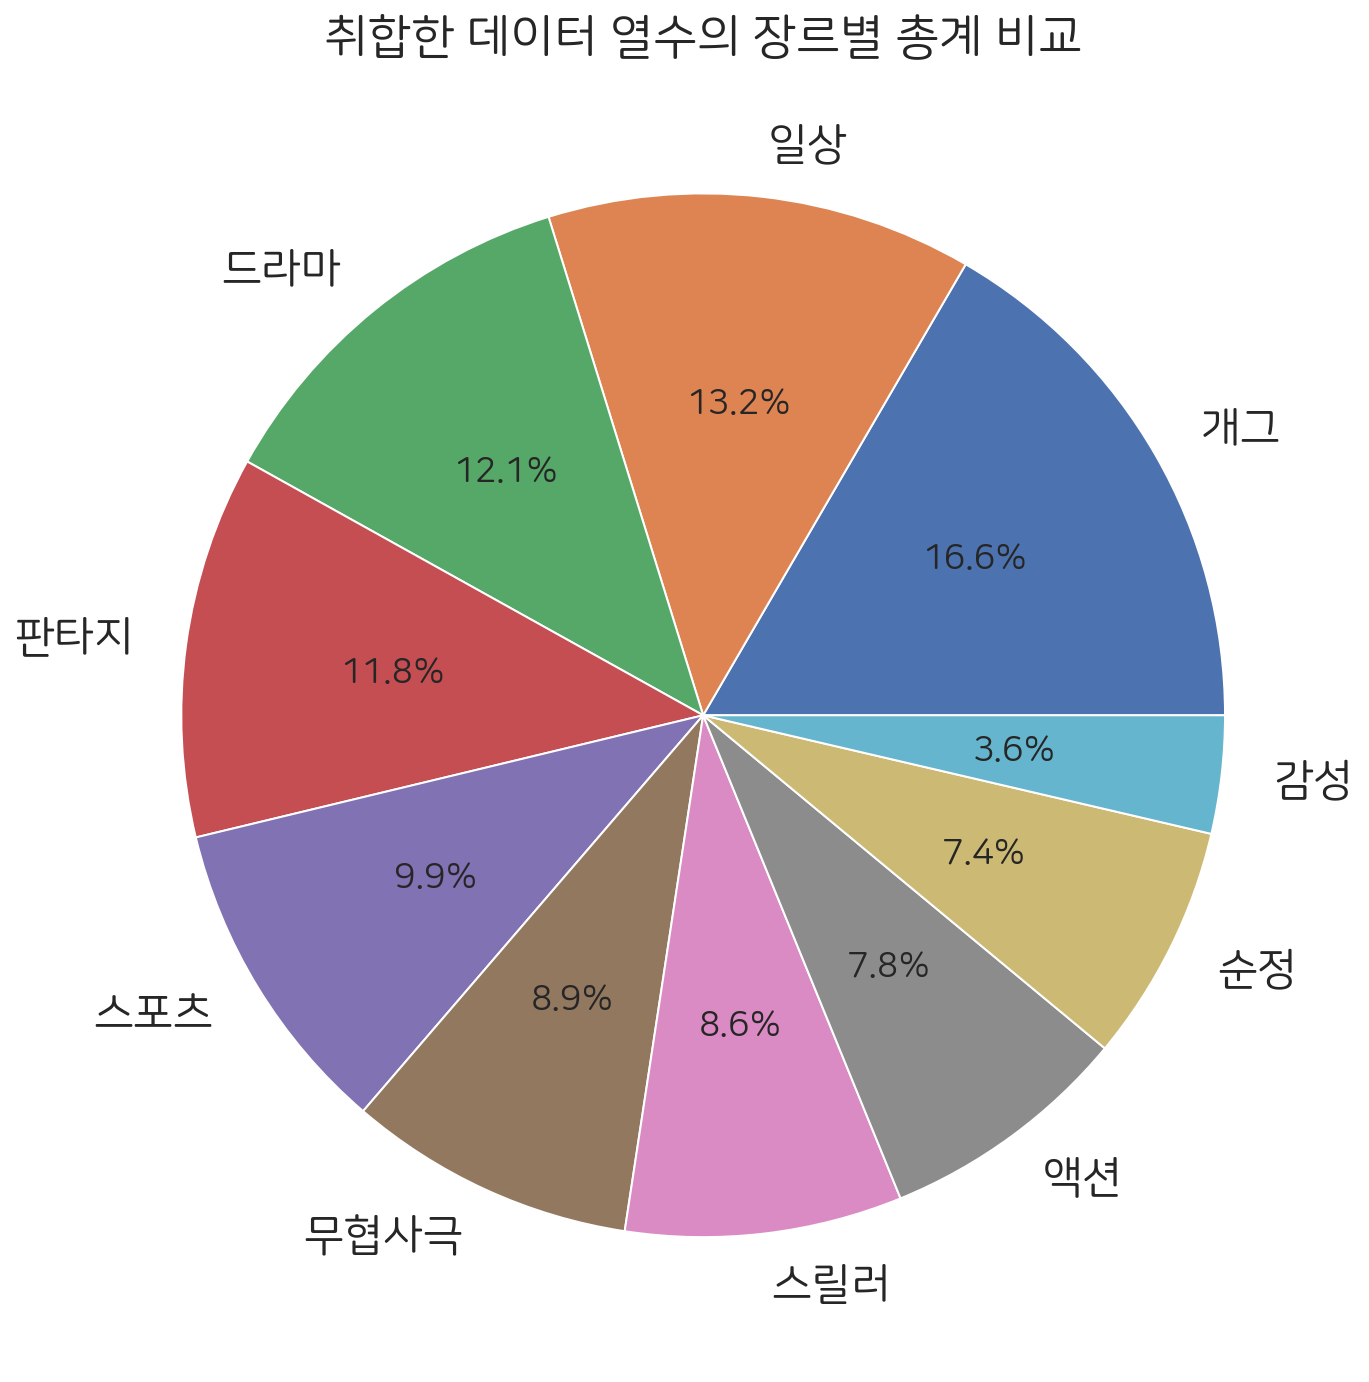

In [ ]:
#@title
# 네이버웹툰 장르별 데이터 취합 분포

rcParams['figure.figsize'] = 12, 12 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
genre_count = df.groupby('장르')[['회차']].count().sort_values('회차', ascending=False)
fig = genre_count.plot.pie(y='회차', legend=False, autopct='%1.1f%%', title='취합한 데이터 열수의 장르별 총계 비교', xlabel='', ylabel='')
print()



> ### 데이터프레임 조견



In [ ]:
#@title
df_ = pd.read_csv('1번토픽_모든장르(최종).csv')
df_.rename(columns={
    "좋아요수": "좋아요(계)",
    "평점기여자수": "평점부여(계)",
    "전체댓글수": "전체댓글(계)",
    "베댓공감수": "베댓공감(총계)",
    "베댓비공감수": "베댓비공감(총계)",
    }, inplace=True)
display(df_)

,제목,장르,회차,좋아요(계),평점,평점부여(계),전체댓글(계),베댓공감(총계),베댓비공감(총계)
0,드로잉레시피,감성,1,11907,9.90,18091,1022,22928,222
1,드로잉레시피,감성,2,6629,9.96,7990,199,22644,114
2,드로잉레시피,감성,3,6348,9.97,12405,225,14435,83
3,드로잉레시피,감성,4,4967,9.97,6562,160,15462,66
4,드로잉레시피,감성,5,4614,9.97,6062,133,16099,141
...,...,...,...,...,...,...,...,...,...
19617,데이즈,스릴러,84,159,8.86,320,32,173,21
19618,데이즈,스릴러,85,151,9.20,294,35,139,18
19619,데이즈,스릴러,86,133,9.08,228,33,162,8
19620,데이즈,스릴러,87,120,8.66,224,23,140,10




> ### 데이터 타입 정보



In [ ]:
#@title
display(df_.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19622 entries, 0 to 19621
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   제목         19622 non-null  object 
 1   장르         19622 non-null  object 
 2   회차         19622 non-null  int64  
 3   좋아요(계)     19622 non-null  int64  
 4   평점         19622 non-null  float64
 5   평점부여(계)    19622 non-null  int64  
 6   전체댓글(계)    19622 non-null  int64  
 7   베댓공감(총계)   19622 non-null  int64  
 8   베댓비공감(총계)  19622 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 1.3+ MB


None



> ### 기초 기술 통계



In [ ]:
#@title
display(df_.describe())

,회차,좋아요(계),평점,평점부여(계),전체댓글(계),베댓공감(총계),베댓비공감(총계)
count,19622.000000,19622.000000,19622.000000,19622.000000,19622.000000,1.962200e+04,19622.000000
mean,169.041586,12160.711446,9.755029,15974.995617,2639.952298,8.251920e+04,1861.962593
std,167.315690,13345.766199,0.602280,16549.785273,8808.001584,1.157539e+05,3883.067795
min,1.000000,0.000000,2.050000,52.000000,0.000000,0.000000e+00,0.000000
25%,54.000000,2525.250000,9.870000,4679.500000,385.000000,1.018275e+04,172.000000
50%,111.000000,7482.500000,9.940000,11427.500000,1031.000000,3.802950e+04,572.000000
75%,230.000000,17267.000000,9.970000,21723.750000,2667.000000,1.070560e+05,1790.750000
max,911.000000,100204.000000,9.990000,269096.000000,974883.000000,1.562649e+06,99645.000000


> #### 평점을 제외한 나머지 STD가 굉장히 크다.
>> ##### 장르별 웹툰별 회차별 독자 참여도가 천차만별임을 알 수 있습니다.
> #### 회차별 좋아요 평균은 약 1.2만개
> #### 수집한 웹툰 중 독립일기 1화의 좋아요 수가 약 10만개로 가장 높았다.
>> ##### 인기 웹툰으로 인정합니다.



In [ ]:
#@title
print('좋아요(계) 최고 수치')
display(df_[df_['좋아요(계)'] == 100204])
print()
print('평점부여(계) 최고 수치')
display(df_[df_['평점부여(계)'] == 269096])
print()
print('전체댓글(계) 최고 수치')
display(df_[df_['전체댓글(계)'] == 974883])
print()
print('베댓공감(총계) 최고 수치')
display(df_[df_['베댓공감(총계)'] == 1.562649e+06])
print()
print('베댓비공감(총계) 최고 수치')
display(df_[df_['베댓비공감(총계)'] == 99645])

좋아요(계) 최고 수치


,제목,장르,회차,좋아요(계),평점,평점부여(계),전체댓글(계),베댓공감(총계),베댓비공감(총계)
14993,독립일지,일상,1,100204,9.95,58100,12648,314596,980



평점부여(계) 최고 수치


,제목,장르,회차,좋아요(계),평점,평점부여(계),전체댓글(계),베댓공감(총계),베댓비공감(총계)
3399,이말년씨리즈,개그,87,3520,2.38,269096,39134,29169,2065



전체댓글(계) 최고 수치


,제목,장르,회차,좋아요(계),평점,평점부여(계),전체댓글(계),베댓공감(총계),베댓비공감(총계)
17762,신의탑,판타지,101,44110,9.95,121541,974883,244534,14951



베댓공감(총계) 최고 수치


,제목,장르,회차,좋아요(계),평점,평점부여(계),전체댓글(계),베댓공감(총계),베댓비공감(총계)
5354,연애혁명,드라마,67,54735,9.96,81842,38526,1562649,28486



베댓비공감(총계) 최고 수치


,제목,장르,회차,좋아요(계),평점,평점부여(계),전체댓글(계),베댓공감(총계),베댓비공감(총계)
5384,연애혁명,드라마,97,58096,9.91,74227,45772,1099219,99645




> #### 수집한 웹툰의 회차수에 관한 기술 통계
>> ##### 인기 순위를 기준으로 100회가 넘어가는 웹툰의 정보를 장르별로 10개씩 크롤링했습니다.
>> ##### 비인기 장르의 경우 작품수가 적어 기준에 준하는 10개 작품을 찾지 못 했습니다.



In [ ]:
#@title
print('장르별 수집 작품 수')
print()
temp = df_.groupby('장르')['제목'].nunique().to_frame()
temp.index.name = None
temp

장르별 수집 작품 수



,제목
감성,5
개그,10
드라마,10
무협사극,8
순정,10
스릴러,10
스포츠,9
액션,10
일상,10
판타지,10


>> ##### 92개 웹툰의 평균 회차수는 213화입니다.
>> ##### 최소 회차 웹툰은 74화, 최대 회차 웹툰은 911화였으며 표준편차는 163으로 역시 상당히 큰 편입니다.
> #### 이런 불균질한 데이터로 장르별 독자 성향 분석을 어떻게 시도할 수 있었을까요..?

In [ ]:
#@title
# 수집한 웹툰의 회차수에 관한 기술 통계

print('수집한 웹툰의 회차수에 관한 기술 통계')
print()
df_.groupby('제목').count().describe()['회차']

수집한 웹툰의 회차수에 관한 기술 통계



count     92.000000
mean     213.282609
std      163.385025
min       74.000000
25%      111.750000
50%      151.500000
75%      258.250000
max      911.000000
Name: 회차, dtype: float64

> ## 일단 전체 트래픽을 한번 살펴보자.

> ### 장르별 트래픽 격차가 크다!
>> #### 무얼 기준으로 해도 트래픽 격차가 크다!

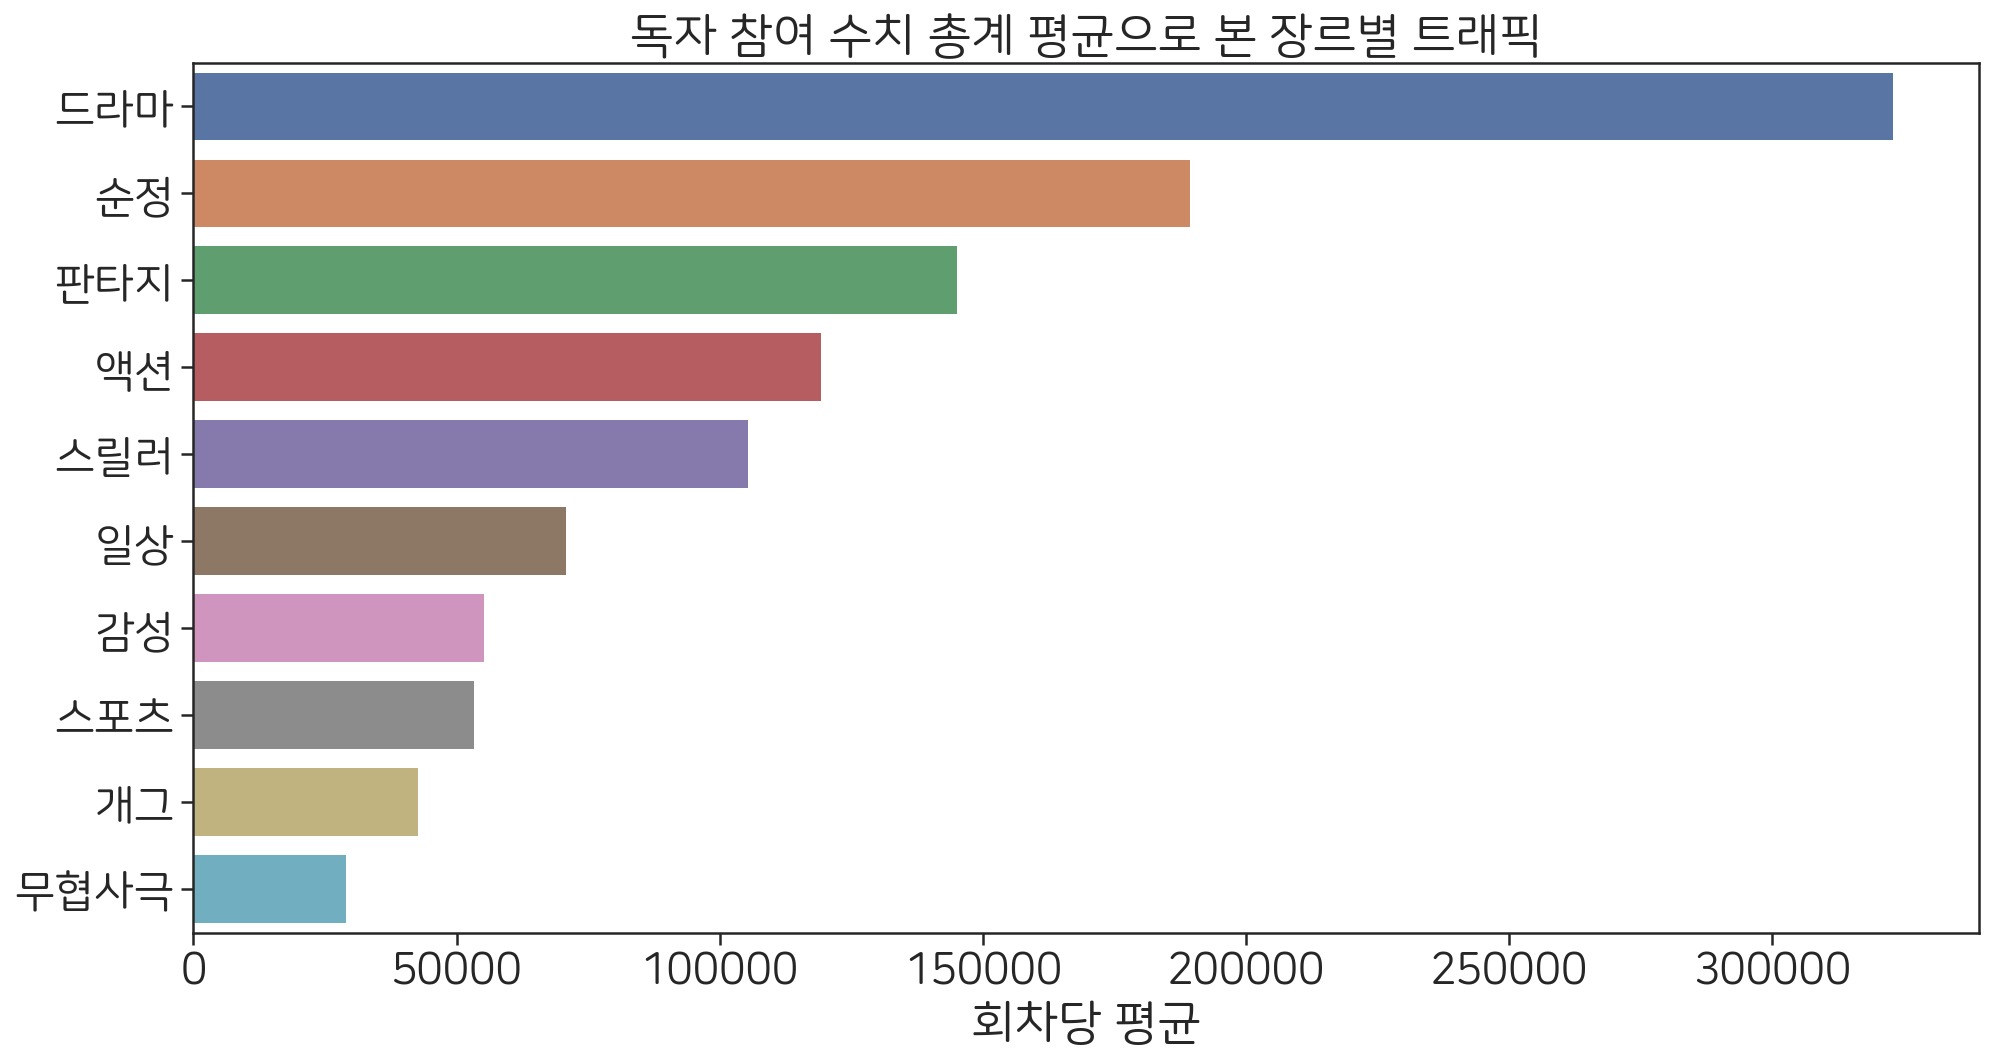

In [ ]:
#@title
# 장르별 전체 트래픽 평균 비교

rcParams['figure.figsize'] = 16, 8 # 플랏 크기 조절
rcParams['font.size'] = '18' # 폰트 크기 조절
df['참여수치합'] = df['좋아요수'] + df['평점기여자수'] + df['전체댓글수'] + df['베댓공감수'] + df['베댓비공감수']
plot = df.groupby('장르')[['참여수치합']].mean().sort_values('참여수치합', ascending=False)
fig = sns.barplot(data=plot, x='참여수치합', y=plot.index, orient='h')
plt.title("독자 참여 수치 총계 평균으로 본 장르별 트래픽")
plt.xlabel("회차당 평균")
plt.ylabel("")
print()

> ### 웹툰 감상 후 독자가 가장 먼저 만나게 되는 참여 창구인 평점 부여 수를 기준으로 생각해본다면?

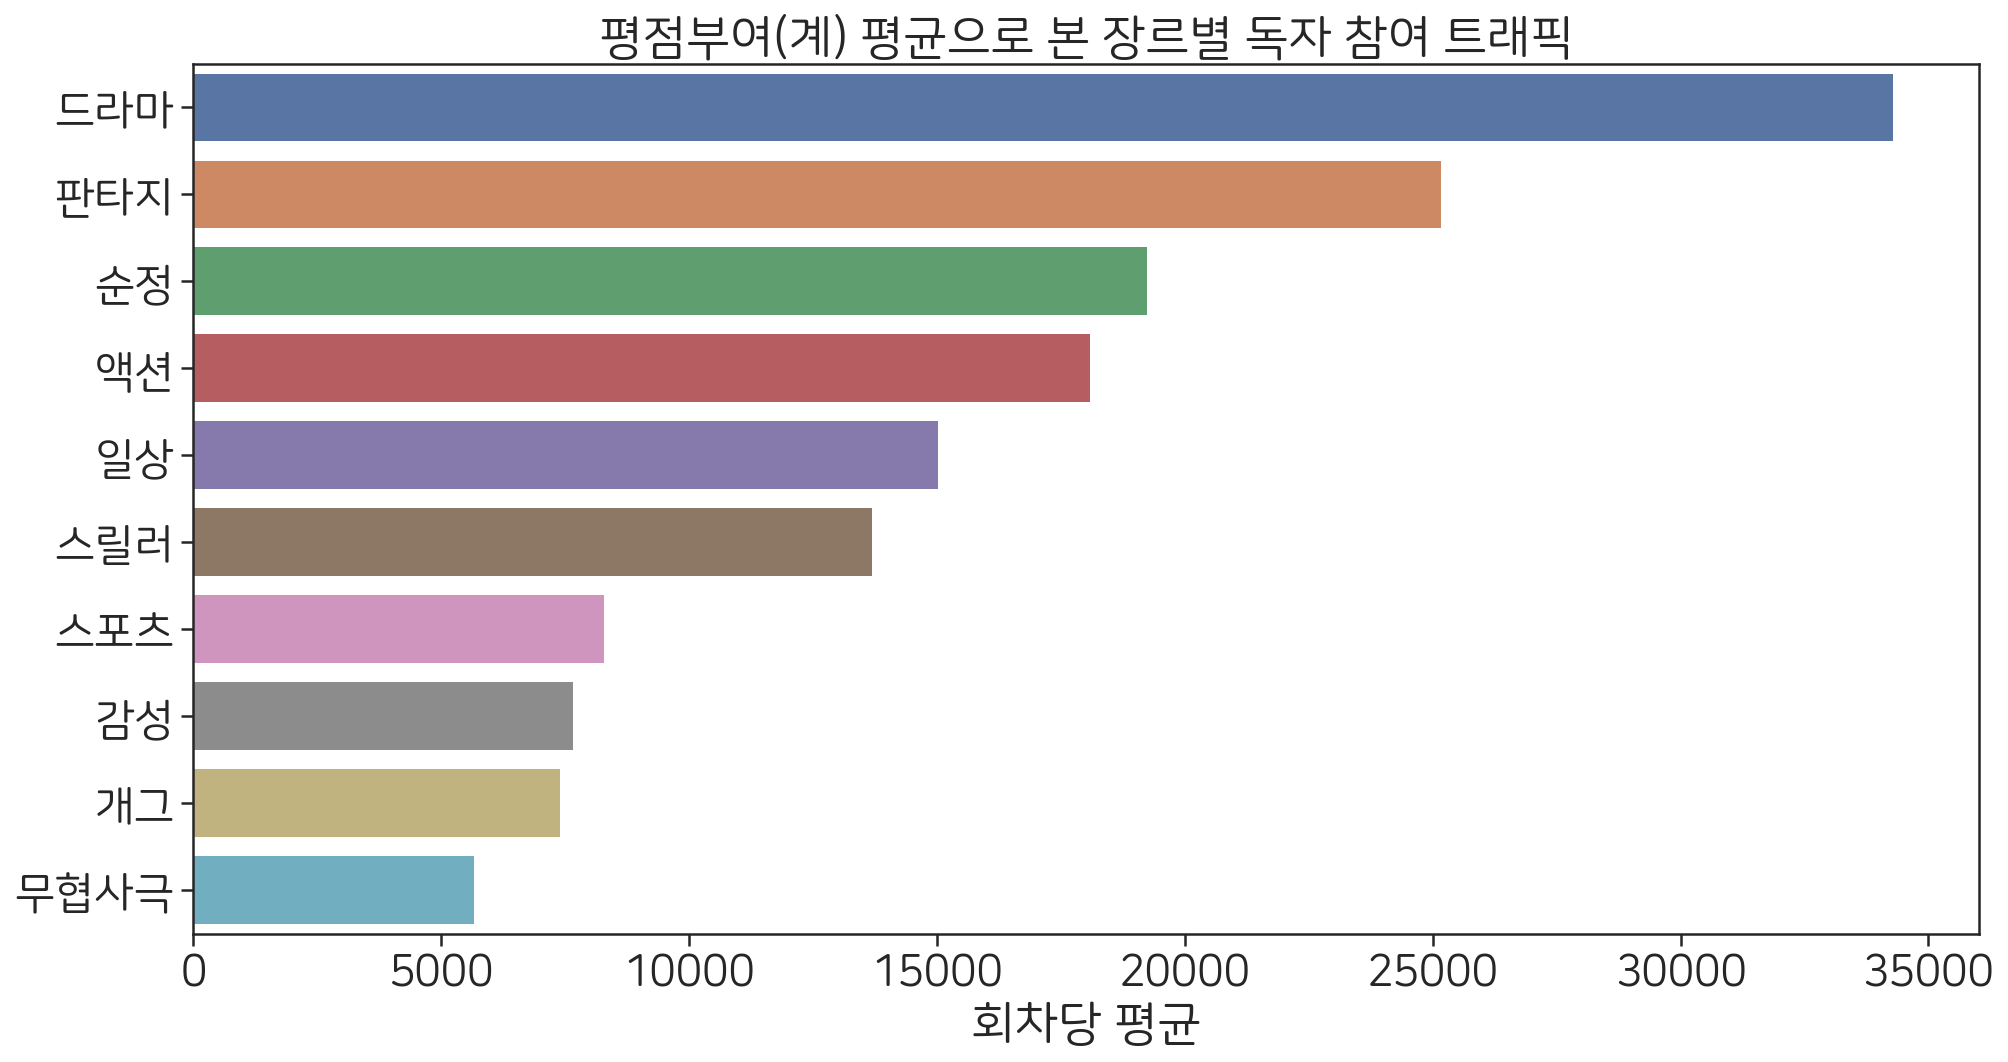

In [ ]:
#@title
# 장르별 평점기여자수 트래픽 평균 비교

plot = df.groupby('장르')[['평점기여자수']].mean().sort_values('평점기여자수', ascending=False)
fig = sns.barplot(data=plot, x='평점기여자수', y=plot.index, orient='h')
plt.title("평점부여(계) 평균으로 본 장르별 독자 참여 트래픽")
plt.xlabel("회차당 평균")
plt.ylabel("")
print()

> #### 평점 부여 수 트래픽 역시 총계의 경우와 비슷한 양상이다.
> #### 하지만 평점 부여는 좋아요와 함께 웹툰 감상 후 독자가 만나게 되는 첫 번째 참여 유도이며 좋아요와 달리 취소가 불가하다.
> #### (또한 수집한 데이터 중 유일하게 0값이 없었던 항목)
> #### 평점 부여 수로 다른 칼럼들을 나눠서 장르별로 그 비율을 살펴보면 어떨까?

> ## 평점 부여 수를 기준으로 비율을 계산하여 발견한 흥미로운 결과들을 살펴보자.

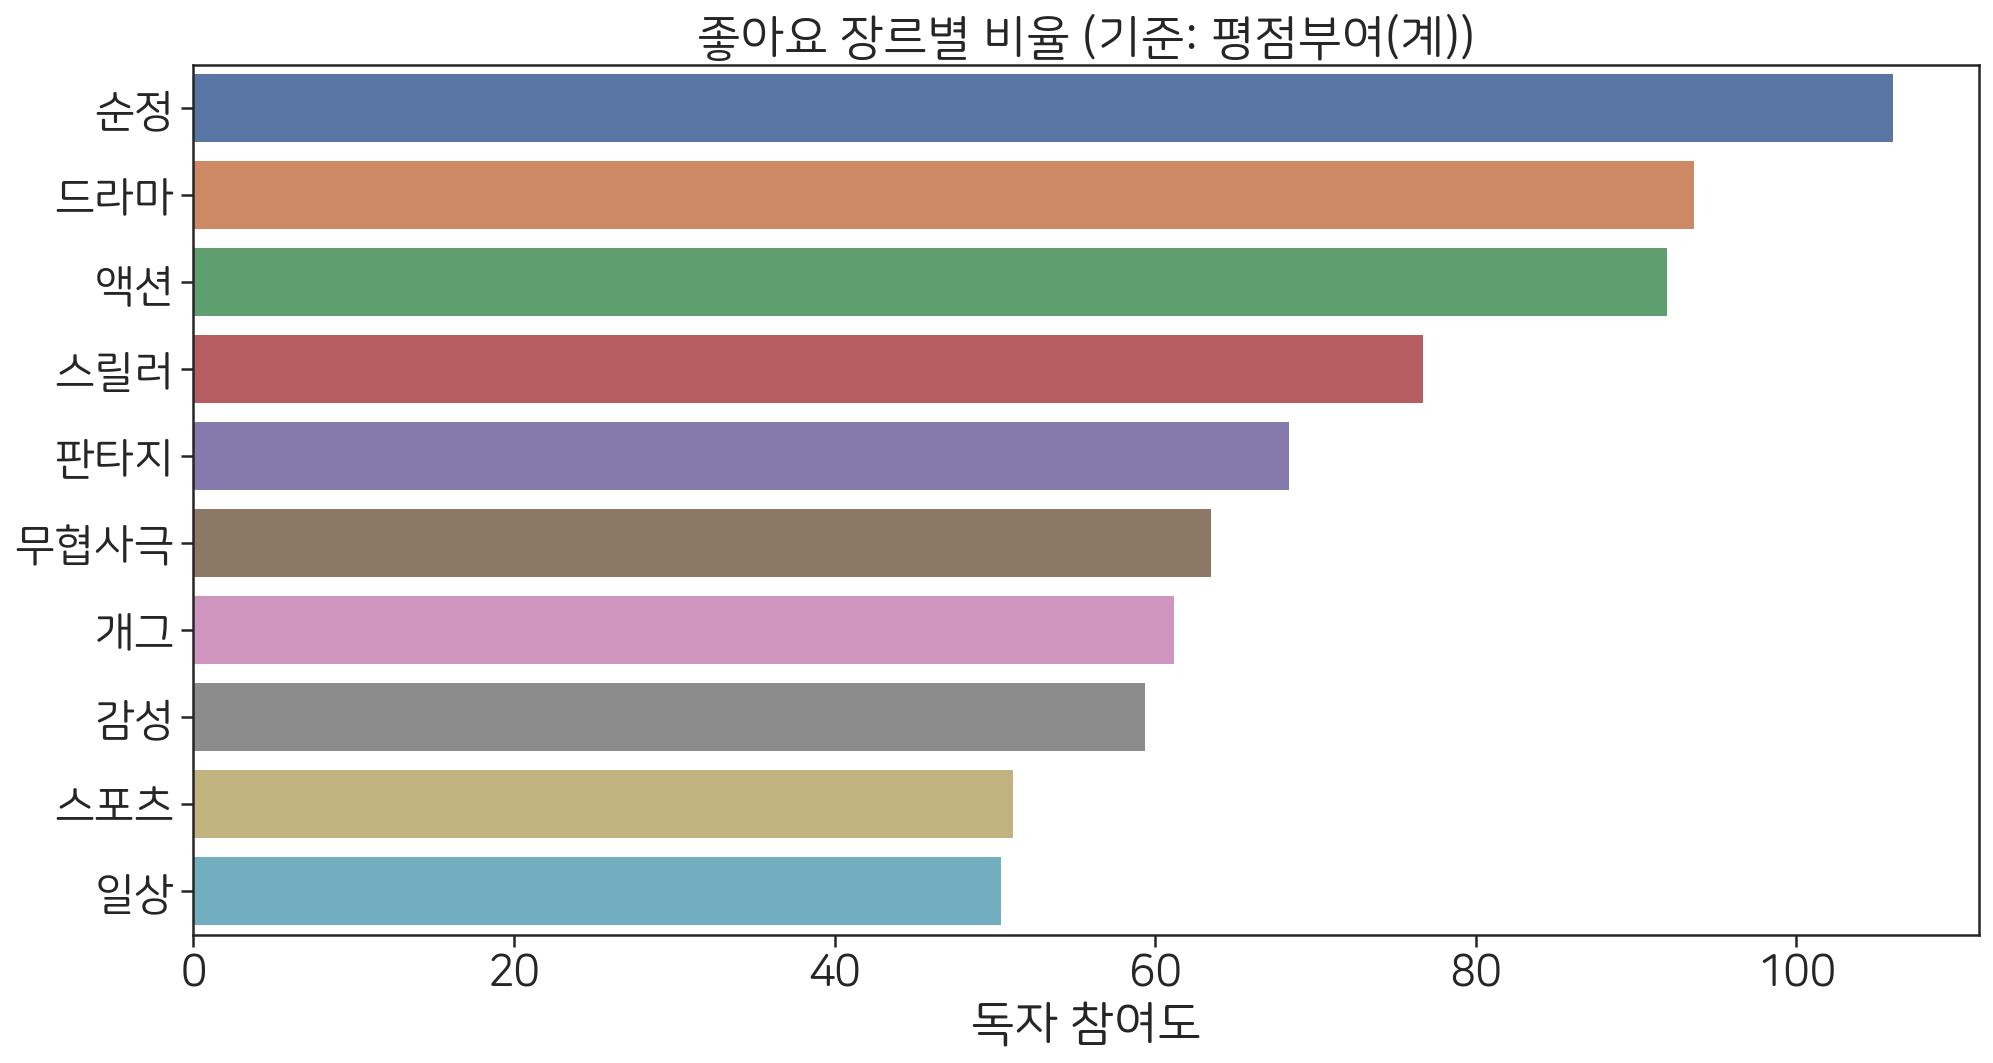

In [ ]:
#@title
# 좋아요 / 평점부여자

df['좋아요비율'] =  df['좋아요수'] / df['평점기여자수']
df['좋아요비율'] = df['좋아요비율'].round(2)*100
plot = df.groupby('장르')[['좋아요비율']].mean().sort_values('좋아요비율', ascending=False)
fig = sns.barplot(data=plot, x='좋아요비율', y=plot.index)
plt.title("좋아요 장르별 비율 (기준: 평점부여(계))")
plt.xlabel("독자 참여도")
plt.ylabel("")
print()

> ### 좋아요의 경우 인기 장르인 순정, 드라마, 액션, 스릴러, 판타지의 강세다.

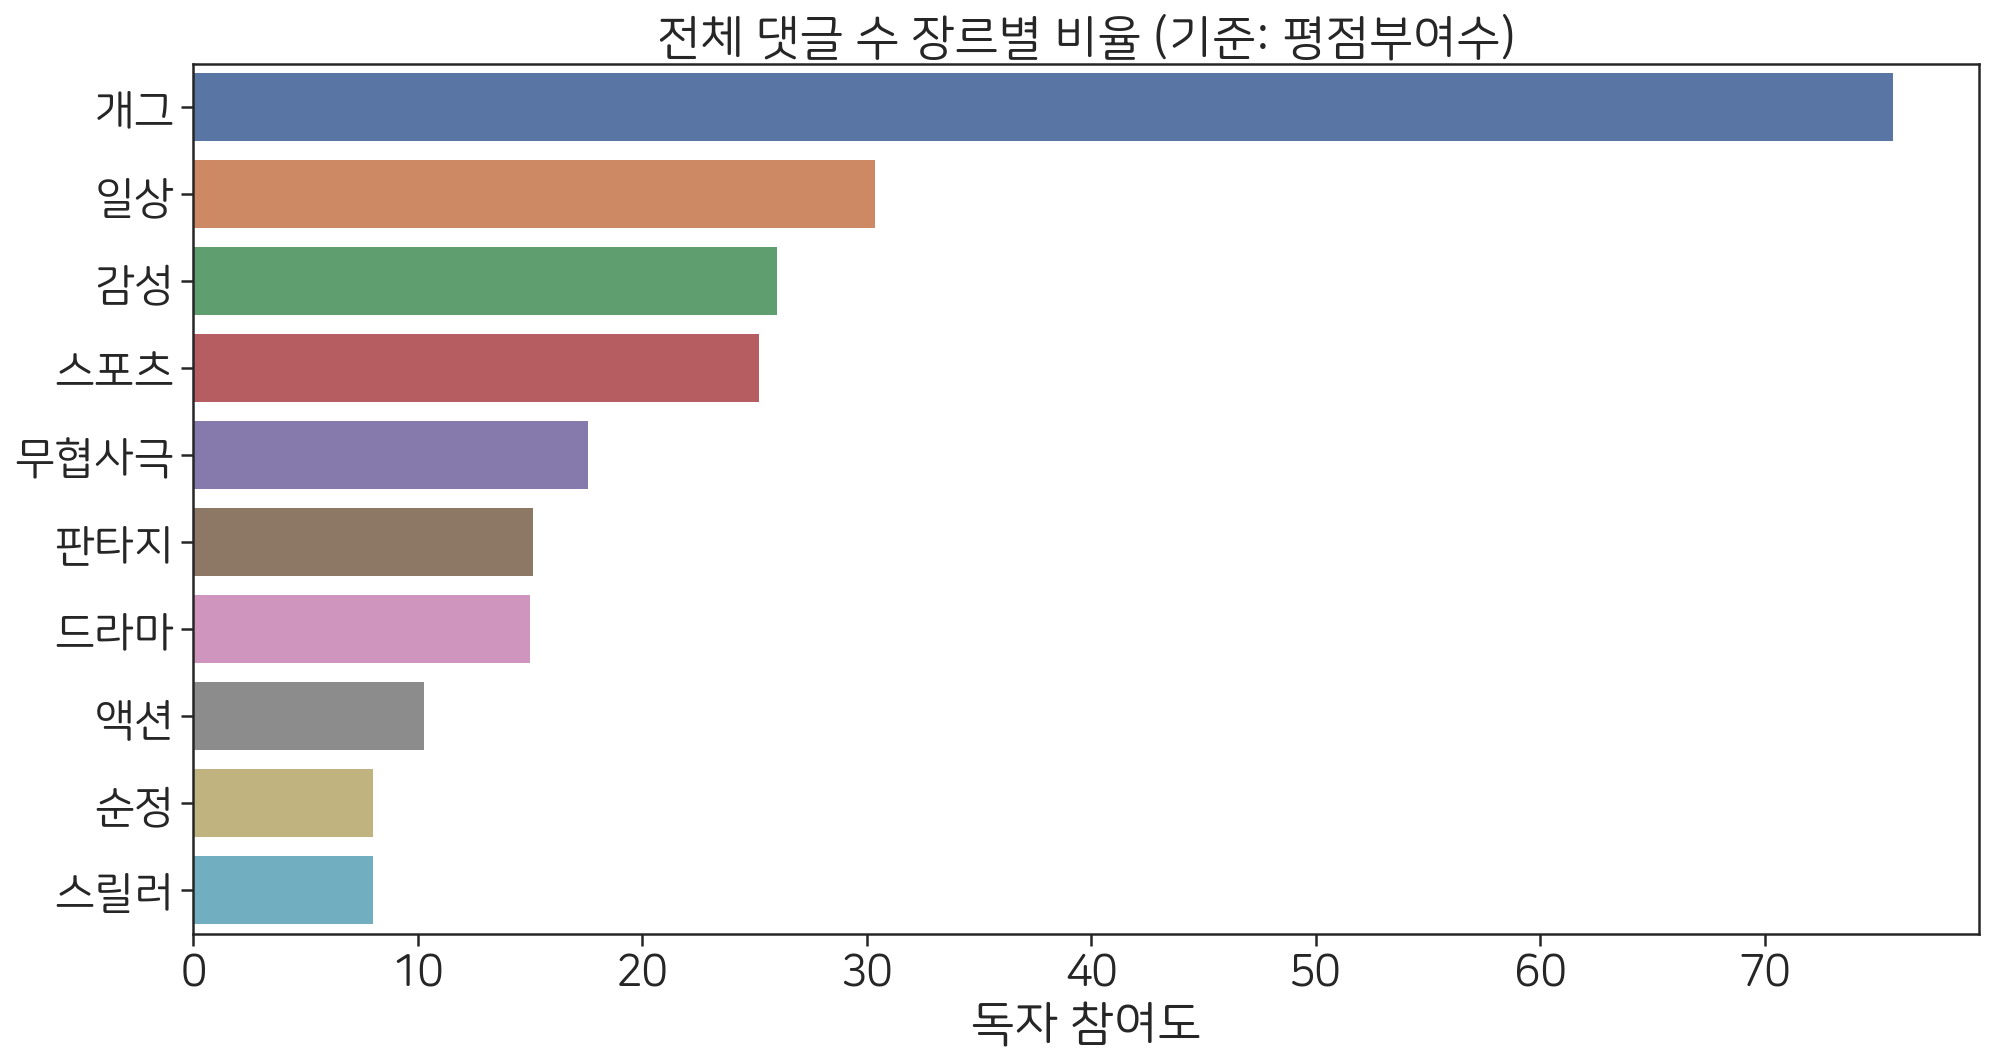

In [ ]:
#@title
# 전체댓글수 / 평점부여자

df['전체댓글수비율'] =  df['전체댓글수'] / df['평점기여자수']
df['전체댓글수비율'] = df['전체댓글수비율'].round(2)*100
plot = df.groupby('장르')[['전체댓글수비율']].mean().sort_values('전체댓글수비율', ascending=False)
fig = sns.barplot(data=plot, x='전체댓글수비율', y=plot.index)
plt.title("전체 댓글 수 장르별 비율 (기준: 평점부여수)")
plt.xlabel("독자 참여도")
plt.ylabel("")
print()

> ### 하지만 댓글의 경우? 인기 장르가 하위권으로 떨어지고 비인기 장르가 상위권으로 도약했다.
> #### 개그 장르의 경우 특별히 더 놀라운 수치를 보여주고 있다.

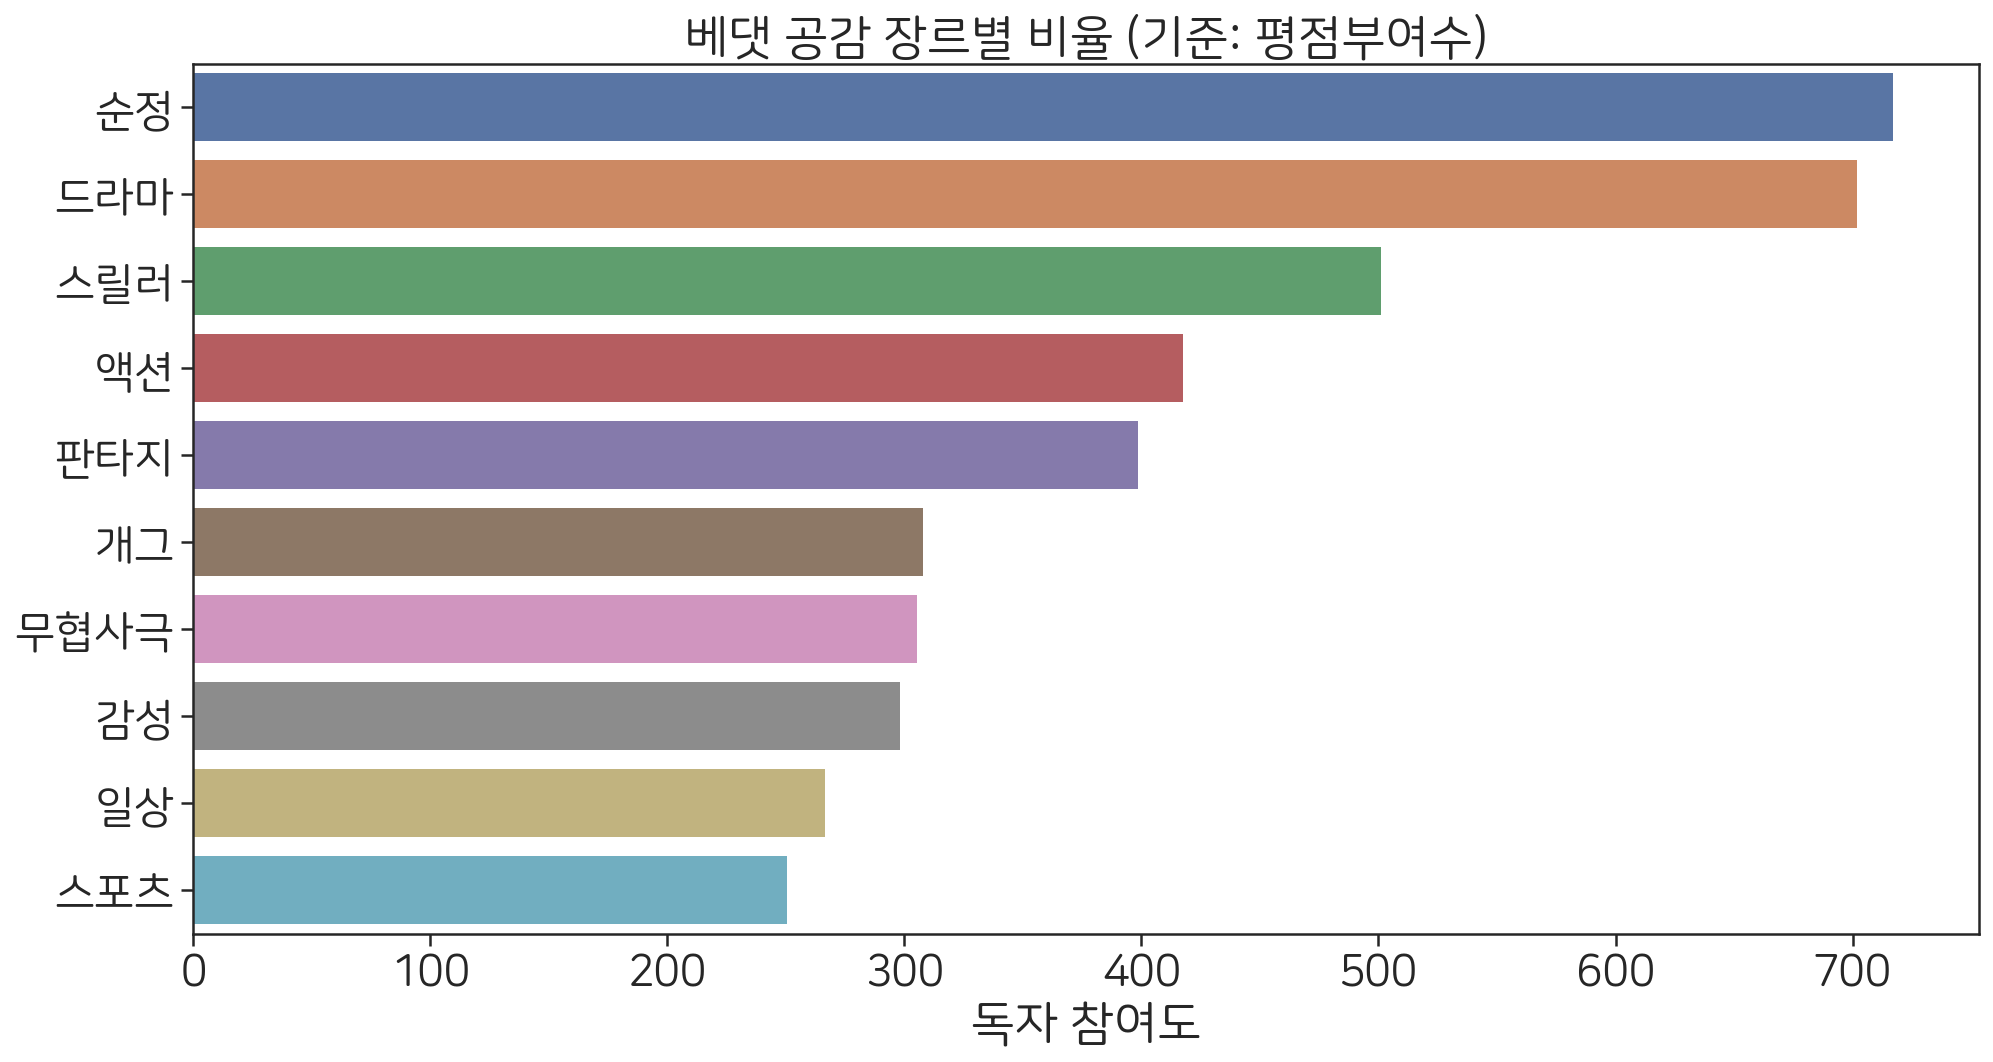

In [ ]:
#@title
# 베댓공감수 / 평점부여자	

df['베댓공감수비율'] =  df['베댓공감수'] / df['평점기여자수']
df['베댓공감수비율'] = df['베댓공감수비율'].round(2)*100
plot = df.groupby('장르')[['베댓공감수비율']].mean().sort_values('베댓공감수비율', ascending=False)
fig = sns.barplot(data=plot, x='베댓공감수비율', y=plot.index)
plt.title("베댓 공감 장르별 비율 (기준: 평점부여수)")
plt.xlabel("독자 참여도")
plt.ylabel("")
print()

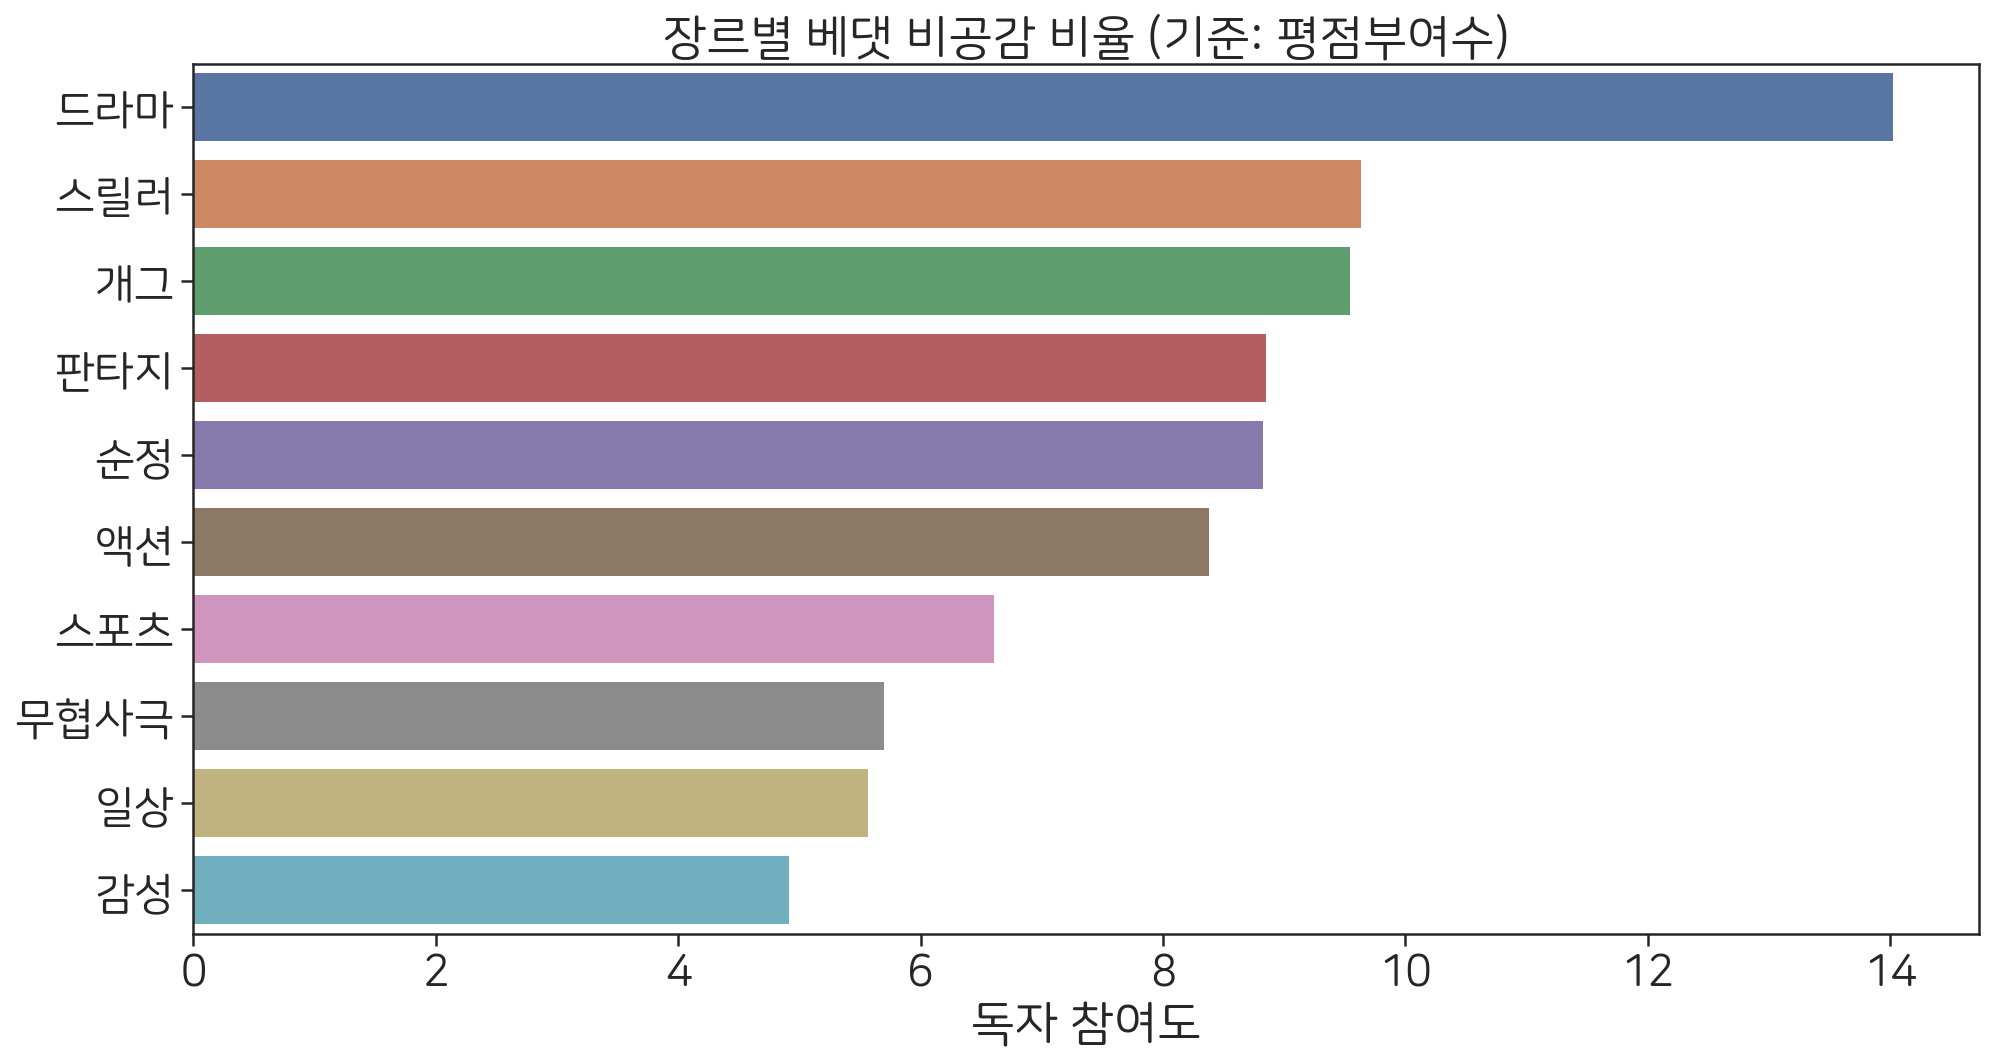

In [ ]:
#@title
# 베댓비공감수 / 평점부여자	

df['베댓비공감수비율'] =  df['베댓비공감수'] / df['평점기여자수']
df['베댓비공감수비율'] = df['베댓비공감수비율'].round(2)*100
plot = df.groupby('장르')[['베댓비공감수비율']].mean().sort_values('베댓비공감수비율', ascending=False)
fig = sns.barplot(data=plot, x='베댓비공감수비율', y=plot.index)
plt.title("장르별 베댓 비공감 비율 (기준: 평점부여수)")
plt.xlabel("독자 참여도")
plt.ylabel("")
print()

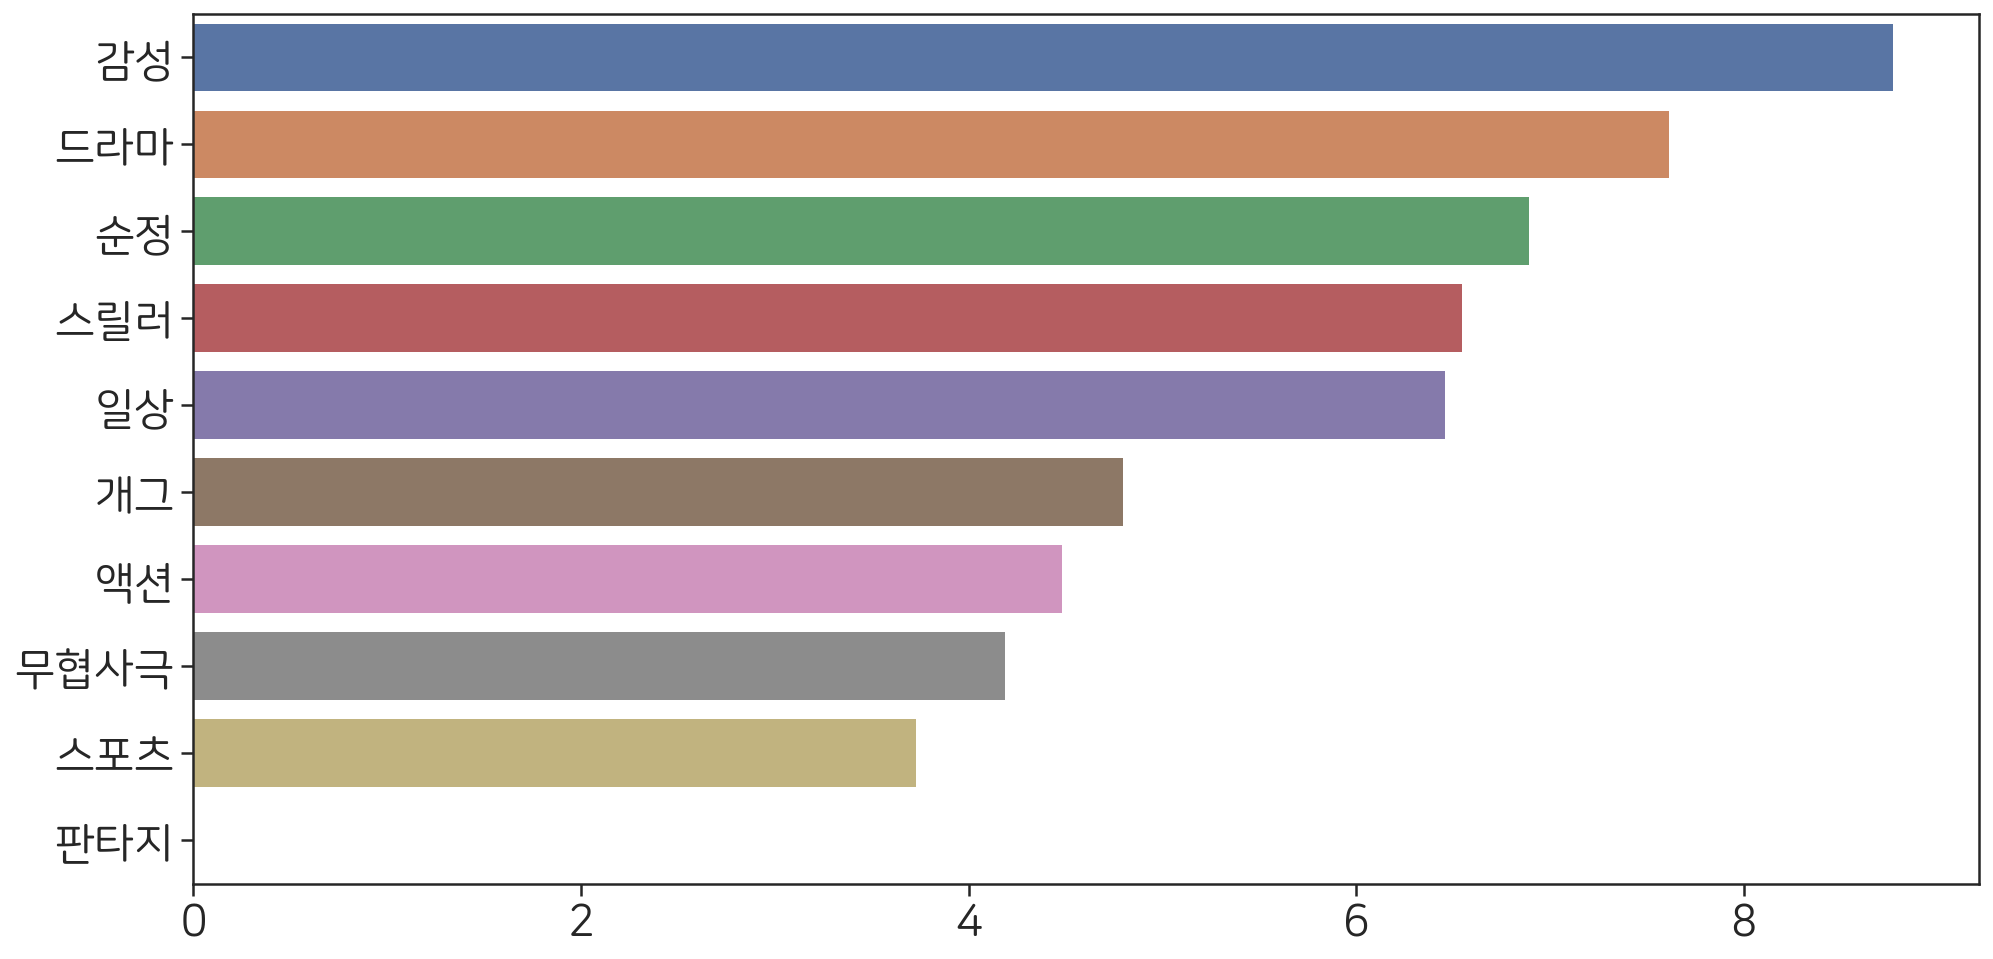

In [ ]:
#@title
df
df['밈발생가능수치'] = df['베댓공감수']/df['좋아요수']
df.groupby('장르')['밈발생가능수치'].mean()
plot = df.groupby('장르')[['밈발생가능수치']].mean().sort_values('밈발생가능수치', ascending=False)
fig = sns.barplot(data=plot, x='밈발생가능수치', y=plot.index)
plt.title("")
plt.xlabel("")
plt.ylabel("")
print()

In [ ]:
#@title
df['좋아요수']

inf